### Product task - removing harmful and offensive comments.
We will take a dataset from Kaggle that includes comments from Russian social networks.

* Machine learning task: Create a binary classifier and select precision / recall metrics for it. Precision should be 95%, which means that every 20 comments can be determined incorrectly.

Steps:
* Dataset search (take from Kaggle)
* EDA (using pandas)
* Text preprocessing (using nltk and scikit-learn)
* Model training (using scikit-learn)
* Creating Pipeline

In [ ]:
import string

import pandas as pd
# Set the maximum width of the 'comment' column to 1000 characters
pd.set_option('display.max_colwidth', 500)
import numpy as np

import plotly.express as px

# It is used for splitting data into training and testing sets
from sklearn.model_selection import train_test_split
# Pipelines are used to chain multiple steps together in a machine learning workflow
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
# It is used to convert text documents into numeric feature vectors
# using TF-IDF representation (term frequency inverse of document frequency).
from sklearn.feature_extraction.text import TfidfVectorizer
# These functions are used to evaluate the performance of classification models.
from sklearn.metrics import precision_score, recall_score, precision_recall_curve
# It is used for visualizing precision-recall curves.
from sklearn.metrics import plot_precision_recall_curve
# It is used for cross-validation of grid search to tune machine learning model hyperparameters.
from sklearn.model_selection import GridSearchCV

# Load the nltk library for natural language processing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# Load the punkt tokenizer data from the NLTK library. Punkt tokenizer
# is used by the word_tokenize function to split text into words or tokens.
nltk.download('punkt')
# It is used to form stemming words, leading them to their base or root form.
from nltk.stem import SnowballStemmer


In [6]:
df = pd.read_csv('./data/comments_labeled.csv') 
df.head(), df.shape

(                                                                                                                                                                                     comment  \
 0                                                                                                                                                       Верблюдов-то за что? Дебилы, бл...\n   
 1                                                                 Хохлы, это отдушина затюканого россиянина, мол, вон, а у хохлов еще хуже. Если бы хохлов не было, кисель их бы придумал.\n   
 2                                                                                                                                                                  Собаке - собачья смерть\n   
 3  Страницу обнови, дебил. Это тоже не оскорбление, а доказанный факт - не-дебил про себя во множественном числе писать не будет. Или мы в тебя верим - это ты и твои воображаемые друзья?\n   
 4                                 

In [7]:
# convert df['toxic'] column to int
df['toxic'] = df['toxic'].astype(int)
df.head()

,comment,toxic
0,"Верблюдов-то за что? Дебилы, бл...\n",1
1,"Хохлы, это отдушина затюканого россиянина, мол, вон, а у хохлов еще хуже. Если бы хохлов не было, кисель их бы придумал.\n",1
2,Собаке - собачья смерть\n,1
3,"Страницу обнови, дебил. Это тоже не оскорбление, а доказанный факт - не-дебил про себя во множественном числе писать не будет. Или мы в тебя верим - это ты и твои воображаемые друзья?\n",1
4,"тебя не убедил 6-страничный пдф в том, что Скрипалей отравила Россия? Анализировать и думать пытаешься? Ватник что ли?)\n",1


In [8]:
# Get the number of each unique value in the 'toxic' column
df['toxic'].value_counts()

0    9586
1    4826
Name: toxic, dtype: int64

In [10]:
# There are a lot of toxic comments in the dataset, but only aggressive and offensive ones are marked as bad.
a = df[df['toxic'] == 1][['comment']].sample(5)
b = df[df['toxic'] == 0][['comment']].head(5)
a, b

(                                                                                                                                                      comment
 13892  Хохлы крайне примитивны, если тонко их троллить они ничего не поймут, другое дело если с ходу вбросить говно, минимум один хохол порвется и ответит.\n
 6776                                                                                     Почитаю твои посты на досуге и посмотрю ebay, может что и подберу)\n
 737                                                                         если хохлы это лахта,то они существуют страно что еще накрутчик раги не врубили\n
 2156               В который раз убеждаюсь, что с идиотами нельзя разговаривать как с нормальными людьми. который обосрал их игру Я её ни разу не запускал.\n
 10767                                                                                                  Да пидор он, доктор - А откуда у вас такие картинки?\n,
                                             

In [11]:
# Divide the data into test dataframe (500 comments) and training dataframe.
train_df, test_df = train_test_split(df, test_size=500)
test_df.shape, train_df.shape

((500, 2), (13912, 2))

In [12]:
test_df['toxic'].value_counts()

0    328
1    172
Name: toxic, dtype: int64

### Text preprocessing.
* First you need to split the text into tokens
* Then remove stop words, punctuation marks from the text, bring the words to their initial form and remove the endings (stemming).

In [13]:
sentence_example = df.loc[1]["comment"]
# split comments into tokens (words, signs)
tokens = word_tokenize(sentence_example, language="russian")
# remove punctuation marks
tokens_without_punctuation = [i for i in tokens if i not in string.punctuation]
# remove stop words
russian_stop_words = stopwords.words("russian")
tokens_without_stop_words_and_punctuation = [i for i in tokens_without_punctuation if i not in russian_stop_words]
# bring words to their initial form (stemming)
snowball = SnowballStemmer(language="russian")
stemmed_tokens = [snowball.stem(i) for i in tokens_without_stop_words_and_punctuation]

In [15]:
# Write a function for text preprocessing
snowball = SnowballStemmer(language="russian")
russian_stop_words = stopwords.words("russian")

def tokenize_sentence(sentence: str, remove_stop_words: bool = True):
    tokens = word_tokenize(sentence, language="russian")
    tokens = [i for i in tokens if i not in string.punctuation]
    if remove_stop_words:
        tokens = [i for i in tokens if i not in russian_stop_words]
    tokens = [snowball.stem(i) for i in tokens]
    return tokens

tokenize_sentence(sentence_example)

['хохл',
 'эт',
 'отдушин',
 'затюкан',
 'россиянин',
 'мол',
 'вон',
 'хохл',
 'хуж',
 'есл',
 'хохл',
 'кисел',
 'придума']

### We will use the TF-IDF algorithm

TF-IDF (Term Frequency - Inverse Document Frequency) is a handy algorithm that uses word frequency to determine how relevant those words are to a given document. However, this NLP method does not depend on the context - for example, the analyzed sentences describe approximately the same thing or not; do not take into account the order of words in a sentence; have a high dimension in the case of a large dictionary, which can reduce the performance of the Deep Learning model.

In [16]:
# Create TF-IDF vectorizer and replace its tokenizer with ours
vectorizer = TfidfVectorizer(tokenizer=lambda x: tokenize_sentence(x, remove_stop_words=True))
# Now we can train our vectorizer. Pass train_df to it and after fit_transform train vectorizer
# it will return ready-made features that we can pass to the machine learning model
features = vectorizer.fit_transform(train_df['comment'])

### Create a model
Features are ready and now we can train the logistic regression model.

In [66]:
model = LogisticRegression(random_state=10)
# fit using for training
model.fit(features, train_df['toxic'])

LogisticRegression(random_state=10)

In [67]:
# the model has been trained and we will test it, for example, on a training dataset
model.predict(features[0])

array([1])

In [68]:
# The model works correctly. We use iloc and not loc to check, because now we have an unsorted array,
# and initial indexes are randomly mixed up when the dataset was divided into training and test ones
train_df['comment'].iloc[0]

'Зигани на фюрера, полегчает...\n'

### Pipeline

In [70]:
# I will create a Pipeline to connect the creation of the model and features.
# It will accept sentences as input, not vectors.
model_pipeline = Pipeline([
    ("vectorizer", TfidfVectorizer(tokenizer=lambda x: tokenize_sentence(x, remove_stop_words=True))),
    ("model", LogisticRegression(random_state=10))
]
)

In [71]:
# Pass to it a list of sentences and labels and train the model.
model_pipeline.fit(train_df["comment"], train_df["toxic"])

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function <lambda> at 0x000001A5C1D605E8>)),
                ('model', LogisticRegression(random_state=10))])

In [72]:
# Trying a positive comment
model_pipeline.predict(["какая-то фича, привет, всё нормально у тебя?"])

array([0])

In [73]:
# Trying a rude comment
model_pipeline.predict(["пошел нахер отсюда"])

array([1])

#### The model works properly in our examples, but we need to calculate the metrics.

y_true: This parameter represents the true (actual) target values. In this case, it refers to the "toxic" column from the test_df data frame, which contains the true labels for each data point.

y_pred: This parameter represents the predicted target values. It can be obtained by calling model_pipeline.predict(test_df["comment"]), which uses the trained model stored in model_pipeline to predict the "comment" column of the test_df dataframe.

In [74]:
# Precision = TP / (TP + FP)
precision_score(y_true=test_df["toxic"], y_pred=model_pipeline.predict(test_df["comment"]))

0.896

In [75]:
# Recall = TP / (TP + FN)
recall_score(y_true=test_df["toxic"], y_pred=model_pipeline.predict(test_df["comment"]))

0.6511627906976745

Now we have:
model precision = 89.6%
Recall = 65.1%

Let's try to improve the metrics of the model, and to achieve the precision = 0.95.

By moving the probability threshold, we can change these parameters.

In [76]:
# The threshold changes from 0 to 1, depending on it, Precision and recall are calculated and then a graph is plotted
# count 3 arrays for building a graph
prec, rec, thresholds = precision_recall_curve(y_true=test_df["toxic"], probas_pred=model_pipeline.predict_proba(test_df["comment"])[:, 1])

d:\Dev\pandas_data_vis\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.



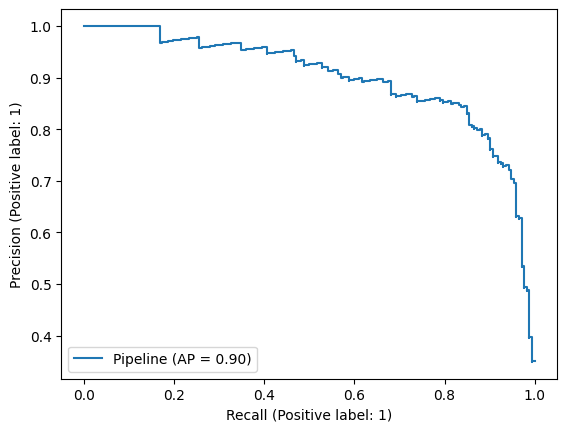

In [77]:
# Build a graph using the standard method: plot_precision_recall_curve(model_pipeline, X_test_df, y_test_df)
plot_precision_recall_curve(estimator=model_pipeline, X=test_df["comment"], y=test_df["toxic"])

This chart is not informative. We need an interactive one to quickly find the most optimal threshold points.

We will use Plotly chart.

In [79]:
# we got prec, rec and thresholds not the same length, so we will exclude the last elements of prec and rec to create a dataframe.
# create a dictionary with arrays
data = {
    "precision": prec[:-1], 
    "recall": rec[:-1],
    "thresholds": thresholds  
}

# create a dataframe
df_tresholds = pd.DataFrame(data)

fig = px.line(
    df_tresholds,
    x="recall",
    y="precision",
    hover_data=["thresholds"],
    title="Precision-Recall Curve",
    width=1200,
    height=500
)

fig.show()

We see that the optimal point for 2 metrics is somewhere here: (prec > 0.95) & (rec > 0.46).
Using Numpy, we try to determine the array number of the element that gives this result.

In [80]:
np.where((prec > 0.95) & (rec > 0.46))

(array([405], dtype=int64),)

In [81]:
df_tresholds.iloc[405]

precision     0.952381
recall        0.465116
thresholds    0.600599
Name: 405, dtype: float64

In [83]:
# Calculate the precision_score again.
precision_score(y_true=test_df["toxic"], y_pred=model_pipeline.predict_proba(test_df["comment"])[:,1] >= thresholds[405])

0.9523809523809523

Let's try to improve the model.

---
C : float, default=1.0

---

The regularization factor must be a positive floating point number. As with support vector machines, smaller values result in stronger regularization.
Let's write a new pipeline in which we will use our logistic regression, vectorizer and they will be wrapped in GridSearch.

In [87]:
grid_pipeline = Pipeline([
    ("vectorizer", TfidfVectorizer(tokenizer=lambda x: tokenize_sentence(x, remove_stop_words=True))),
    ("model", 
     GridSearchCV(
        LogisticRegression(random_state=10),
        # 3 random parameters for C.
        param_grid={'C': [0.2, 1, 2]},
        # during cross validation, we will split it into 3 folds. Fitting 3 folds for each of the 3 candidates
        cv=3,
        # display all information about training in the terminal
         verbose=4
        )
    )
])

In [88]:
# We pass to Pipeline a list of sentences, labels and GridSearch and also train the model.
grid_pipeline.fit(train_df["comment"], train_df["toxic"])

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 1/3] END .............................C=0.2;, score=0.734 total time=   0.2s
[CV 2/3] END .............................C=0.2;, score=0.730 total time=   0.2s
[CV 3/3] END .............................C=0.2;, score=0.733 total time=   0.1s
[CV 1/3] END ...............................C=1;, score=0.839 total time=   0.5s
[CV 2/3] END ...............................C=1;, score=0.844 total time=   0.5s
[CV 3/3] END ...............................C=1;, score=0.834 total time=   0.4s
[CV 1/3] END ...............................C=2;, score=0.856 total time=   0.6s
[CV 2/3] END ...............................C=2;, score=0.862 total time=   0.5s
[CV 3/3] END ...............................C=2;, score=0.851 total time=   0.5s


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function <lambda> at 0x000001A5C260AC18>)),
                ('model',
                 GridSearchCV(cv=3,
                              estimator=LogisticRegression(random_state=10),
                              param_grid={'C': [0.2, 1, 2]}, verbose=4))])

In [90]:
# Substitute parameter C = 2 and create a pipeline
model_pipeline_c_1 = Pipeline([
    ("vectorizer", TfidfVectorizer(tokenizer=lambda x: tokenize_sentence(x, remove_stop_words=True))),
    ("model", LogisticRegression(random_state=0, C=2))
]
)

In [91]:
model_pipeline_c_1.fit(train_df["comment"], train_df["toxic"])

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function <lambda> at 0x000001A5C2B7FA68>)),
                ('model', LogisticRegression(C=2, random_state=0))])

In [95]:
# Trying a rude comment
model_pipeline.predict(["пошел нахер отсюда"])

array([1])

In [94]:
# Trying a positive comment
model_pipeline_c_1.predict(["какая-то  фича, привет, всё нормально у тебя?"])

array([0])

In [58]:
# count 3 arrays for building a chart
prec_c_1, rec_c_1, thresholds_c_1 = precision_recall_curve(y_true=test_df["toxic"], probas_pred=model_pipeline_c_1.predict_proba(test_df["comment"])[:, 1])

In [60]:
prec_c_1, rec_c_1, thresholds_c_1
data = {
    "precision": prec_c_1[:-1], 
    "recall": rec_c_1[:-1],
    "thresholds": thresholds_c_1  
}

df_tresholds = pd.DataFrame(data)

fig = px.line(
    df_tresholds,
    x="recall",
    y="precision",
    hover_data=["thresholds"],
    title="Precision-Recall Curve",
    width=1200,
    height=500
)

fig.show()

Conclusion: with random_state = 10, we got precision = 95%, recall = 46%.
An attempt to improve the model through the regularization coefficient was not successful. We need to try other training methods since we have just used the most basic one.